In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#pre-processing images taken from keras documentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Images/DATASET/TRAIN',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'Images/DATASET/TEST',
    target_size=(256, 256),
    batch_size=4,
    class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [3]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the Model
classifier.add(Flatten())

# Connecting all layer
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the model
classifier.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [4]:
class1 = classifier.fit(
    training_set,
    epochs=20,
    validation_data=test_set)

Epoch 1/20
22564/22564 [==============================] - 211s 9ms/step - loss: 0.5471 - accuracy: 0.7366 - val_loss: 0.5664 - val_accuracy: 0.8313
Epoch 2/20
22564/22564 [==============================] - 214s 10ms/step - loss: 0.4656 - accuracy: 0.7904 - val_loss: 0.0563 - val_accuracy: 0.8890
Epoch 3/20
22564/22564 [==============================] - 222s 10ms/step - loss: 0.4166 - accuracy: 0.8197 - val_loss: 0.0725 - val_accuracy: 0.8185
Epoch 4/20
22564/22564 [==============================] - 216s 10ms/step - loss: 0.4033 - accuracy: 0.8303 - val_loss: 0.2010 - val_accuracy: 0.8647
Epoch 5/20
22564/22564 [==============================] - 210s 9ms/step - loss: 0.3930 - accuracy: 0.8296 - val_loss: 0.0684 - val_accuracy: 0.8472
Epoch 6/20
22564/22564 [==============================] - 209s 9ms/step - loss: 0.3882 - accuracy: 0.8354 - val_loss: 0.0059 - val_accuracy: 0.8651
Epoch 7/20
22564/22564 [==============================] - 210s 9ms/step - loss: 0.3848 - accuracy: 0.8395 - v

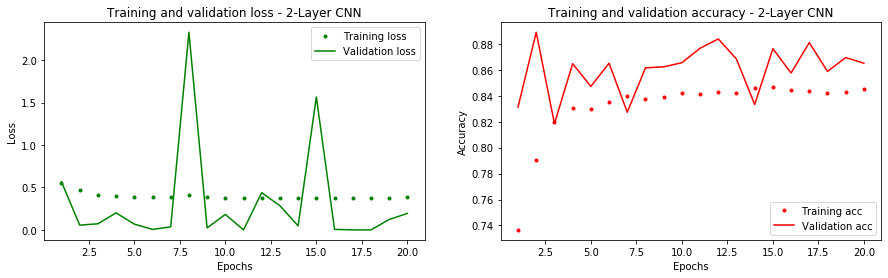

In [5]:
#Extracting CNN Results for Visualization
hist_cnn = class1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn1.png')
plt.show()